In [1]:
#Importing numpy,pandas and matplotlib libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\rahul\Downloads\archive (6)\data.csv",encoding="iso-8859-1")

In [10]:
#displaying the first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Checking the number of null values in this dataset
missing_values=df.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#Replacing null values in description col to "No Description"
df["Description"].fillna("No Description",inplace=True)

In [6]:
df=df.dropna(subset=["CustomerID"])

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#Changing Invoice Date column to a date time format
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [11]:
#Removing any row having quantity or unit price less than or =0
df=df[(df["Quantity"]>0) & (df["UnitPrice"]>0)]

In [ ]:
EDA

In [13]:
summary_stats=df.describe()
print(summary_stats)

            Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


In [14]:
#Counting all unique items sold
Unique_Items_Count=df["Description"].nunique()
Unique_Items_Count

3877

In [15]:
#What are the Total Sales
df["Sales"]=df["Quantity"]*df["UnitPrice"]
df["Sales"]

In [17]:
#Top 10 Items sold ordered by sales
Top_Items=df.groupby("Description")["Sales"].sum().sort_values(ascending=False).head(10)
Top_Items

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Sales, dtype: float64

In [19]:
#Least sold items ordered by Sales
Least_sold_Items=df.groupby("Description")["Sales"].sum().sort_values(ascending=True).head(10)
Least_sold_Items

Description
PADS TO MATCH ALL CUSHIONS             0.003
HEN HOUSE W CHICK IN NEST              0.420
SET 12 COLOURING PENCILS DOILEY        0.650
VINTAGE BLUE TINSEL REEL               0.840
PINK CRYSTAL GUITAR PHONE CHARM        0.850
PURPLE FRANGIPANI HAIRCLIP             0.850
CAT WITH SUNGLASSES BLANK CARD         0.950
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
PACK 4 FLOWER/BUTTERFLY PATCHES        1.250
Name: Sales, dtype: float64

In [24]:
#Product Popularity:Determine the most popular product based on quantity sold
product_sales=df.groupby("Description").agg(Total_Quantity_Sold=('Quantity','sum')).reset_index()
product_sales_sorted=product_sales.sort_values(by="Total_Quantity_Sold",ascending=False)

In [30]:
#Display Top 10 Products sold
top10products=product_sales_sorted.head(10)
top10products

,Description,Total_Quantity_Sold
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1762,JUMBO BAG RED RETROSPOT,46181
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2269,PACK OF 72 RETROSPOT CAKE CASES,33693
2600,POPCORN HOLDER,30931
2656,RABBIT NIGHT LIGHT,27202
2047,MINI PAINT SET VINTAGE,26076


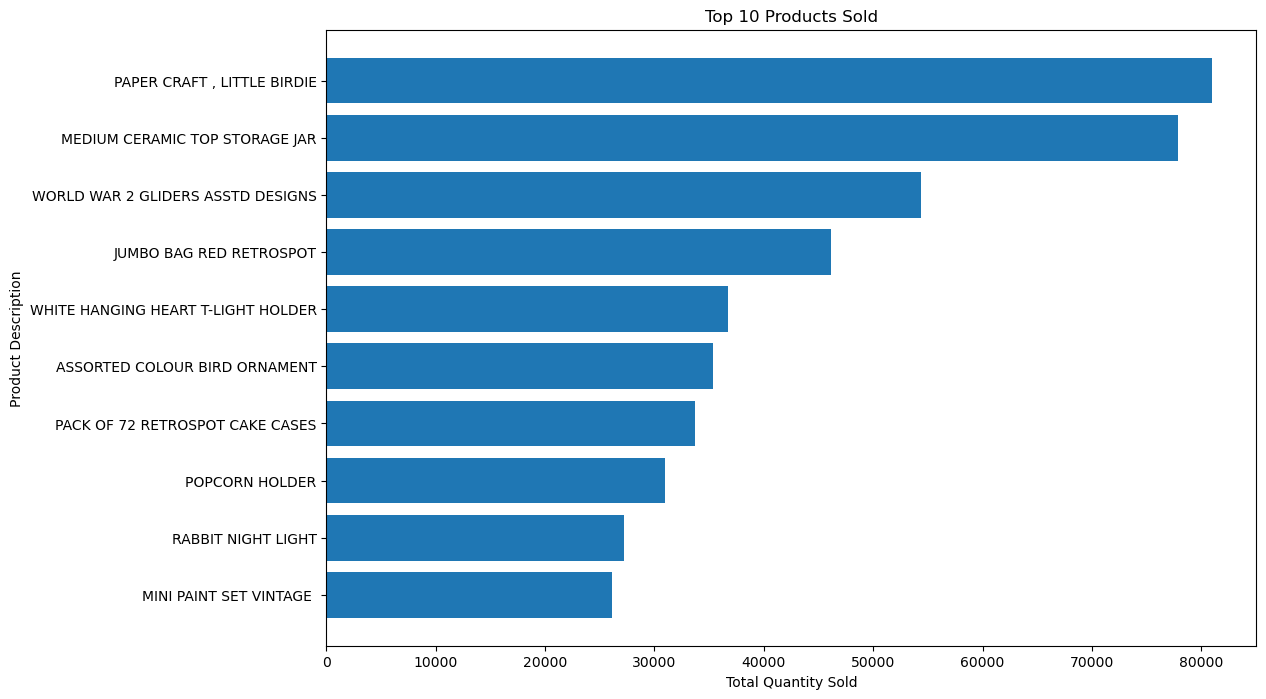

In [29]:
plt.figure(figsize=(12,8))
plt.barh(top10products["Description"],top10products["Total_Quantity_Sold"])
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.title("Top 10 Products Sold")
plt.gca().invert_yaxis()  #To have highest values at top
plt.show()

In [35]:
birdie_data=df[df['Description']=="MEDIUM CERAMIC TOP STORAGE JAR"]
birdie_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-05-12 10:10:00,1.04,14646.0,Netherlands,99.84
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-05-12 12:11:00,1.25,16745.0,United Kingdom,5.00
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2011-05-12 16:29:00,1.25,14651.0,United Kingdom,6.25
187868,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,2011-05-12 16:52:00,1.25,13601.0,United Kingdom,3.75
...,...,...,...,...,...,...,...,...,...
526381,580665,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-12-05 14:06:00,1.04,16684.0,United Kingdom,99.84
531499,580956,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,1.25
532826,580997,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-12-06 17:23:00,1.25,15023.0,United Kingdom,5.00
533742,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-07 12:16:00,1.25,15984.0,United Kingdom,2.50


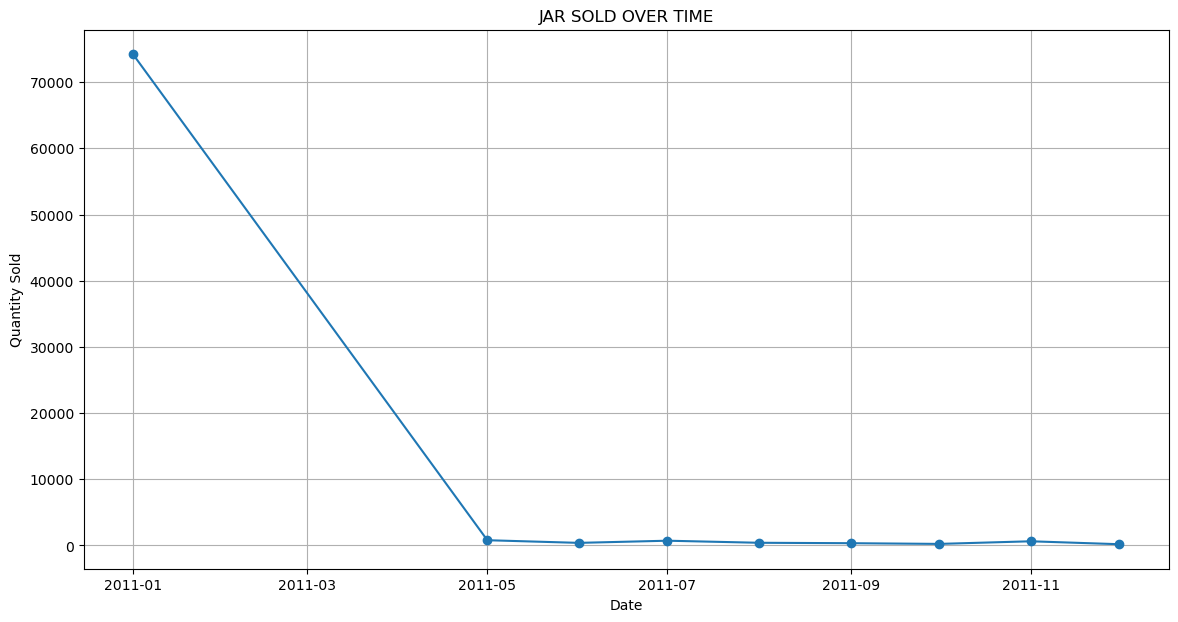

In [36]:
#Filter the DataFrame for MEDIUM CERAMIC TOP STORAGE JAR product
birdie_data=df[df['Description']=="MEDIUM CERAMIC TOP STORAGE JAR"]

#Group the data by month and sum up the quantities to see the total number sold over time
birdie_data_sales_over_time=birdie_data.groupby(birdie_data["InvoiceDate"].dt.to_period("M"))["Quantity"].sum().reset_index()

#Convert the InvoiceDate from Period to Timestamp for plotting 
birdie_data_sales_over_time["InvoiceDate"]=birdie_data_sales_over_time["InvoiceDate"].dt.to_timestamp()

#Plot the time-series for quantity of birdie sold
plt.figure(figsize=(14,7))
plt.plot(birdie_data_sales_over_time["InvoiceDate"],birdie_data_sales_over_time["Quantity"],marker="o")
plt.title("JAR SOLD OVER TIME")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.show()
